In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from keras.optimizers import SGD

seed = 128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
root = "/home/ubuntu/music/Checked/"
path = os.path.join(root, "targetdirectory")
list1 = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if name.endswith(".png"):
            cla = re.search('Checked/(\d+)', os.path.join(path))
            path1 = os.path.join(path) + '/' + name
            list1.append([os.path.join(name), path1, cla.group(1)])
            
#             print j, os.path.join(name)
#             dict1.update({os.path.join(path), os.path.join(name)})
#             rows_list.append(dict1)

dff = pd.DataFrame(list1, columns=['name','path','key'])

In [3]:
j = 0
df0 = pd.DataFrame(columns=['name','path','key'])
# dff.loc[df['key'] == j]
for i in range(50):
    df0 = dff[dff['key'] == 3]
#     j += 1


In [4]:
# dff = dff.sample(500)

In [5]:
dff['key'].value_counts()

1     1170
0      915
2      820
11     628
10     568
3      344
9      276
4      175
8      131
7      101
5       35
6       31
Name: key, dtype: int64

In [8]:
    temp = []
    i = 0
    for img_name in dff['path']:
        if os.path.isfile(img_name):
            image_path = os.path.join(img_name)
    #         print image_path
            img = imread(image_path, flatten=True)
            img = img.astype('float32')
            temp.append(img)
            i += 1
print i

5194


In [9]:
y = dff['key'].values
x=np.stack(temp)
x = x.reshape(i, 300, 300, 1).astype('Float32')
# x = x.reshape(i, 90000).astype('Float32')
x /= 255.0
x = 1.0 - x
print x.shape
print y.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


(5194, 300, 300, 1)
(5194,)


In [10]:
#plt.imshow(x[111].reshape(300,300))

In [11]:
xtr, xte, ytr, yte = train_test_split(x, y, stratify=y)

In [12]:
ytr = keras.utils.np_utils.to_categorical(ytr, 12)
yte = keras.utils.np_utils.to_categorical(yte, 12)

In [22]:
input_num_units = 90000
hidden_num_units = 20
output_num_units = 12
epochs = 20
batch_size = 128
pixel_count = 90000

In [14]:
# model = Sequential()
# model.add(Dense(128, input_shape=(pixel_count,)))
# model.add(Activation('sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(language_count))
# model.add(Activation('softmax'))

# # input_reshape = (300,300,1)
# # pool_size = (2, 2)
# # train_x_temp = xtr.reshape(-1, 300, 300, 1)
# # val_x_temp = xte.reshape(-1, 300, 300, 1)

# # #  Convolution2D(25, 5, 5, activation='relu'),
# # #  MaxPooling2D(pool_size=pool_size),

# # #  Convolution2D(25, 4, 4, activation='relu'),

# #  Flatten(),

# # #  Dense(output_dim=output_num_units, activation='relu'),
# # # 
# #  Dense(output_dim=12, input_dim=hidden_num_units, activation='softmax'),
# # ])

# # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # trained_model_conv = model.fit(train_x_temp, ytr)
# # #         nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x_temp, yte))

In [15]:
# model = Sequential()
# model.add(Convolution2D(10, 3, 3, input_shape=(300, 300, 1)))
# model.add(Activation('sigmoid'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(1000))

# # Non Convo
# # model.add(Dense(2000, input_shape=(pixel_count,)))

# model.add(Activation('sigmoid'))
# # model.add(Dropout(0.5))
# model.add(Dense(output_num_units))
# model.add(Activation('softmax'))

# # sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)


In [28]:
model = Sequential()
model.add(Convolution2D(20, 3, 4, input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # Added Round 2
# model.add(Convolution2D(16, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Convolution2D(16, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))

# Non Convo
# model.add(Dense(2000, input_shape=(pixel_count,)))

model.add(Activation('relu'))
model.add(Dense(output_num_units))
model.add(Activation('softmax'))

In [31]:
# Adagrad
# adagrad = keras.optimizers.Adagrad(lr=0.0001, epsilon=1e-08, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer="sgd",  metrics=['accuracy'])

# RMS
# rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer=rms,  metrics=['accuracy'])

# SGD
sgd = SGD(lr=0.01, decay=0, momentum=0, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,  metrics=['accuracy'])

In [32]:
trained_model = model.fit(xtr, ytr, nb_epoch=epochs, batch_size=batch_size, validation_data=(xte, yte))

Train on 3895 samples, validate on 1299 samples
Epoch 1/20
3895/3895 [==============================] - 17s - loss: 2.8776 - acc: 0.4033 - val_loss: 1.9390 - val_acc: 0.2717
Epoch 2/20
3895/3895 [==============================] - 17s - loss: 1.4195 - acc: 0.5376 - val_loss: 2.3065 - val_acc: 0.2286
Epoch 3/20
3895/3895 [==============================] - 17s - loss: 1.2725 - acc: 0.5861 - val_loss: 1.5209 - val_acc: 0.4873
Epoch 4/20
3895/3895 [==============================] - 17s - loss: 0.9548 - acc: 0.7101 - val_loss: 1.4526 - val_acc: 0.5443
Epoch 5/20
3895/3895 [==============================] - 17s - loss: 0.8689 - acc: 0.7435 - val_loss: 1.4561 - val_acc: 0.5258
Epoch 6/20
3895/3895 [==============================] - 16s - loss: 0.6483 - acc: 0.8200 - val_loss: 1.6661 - val_acc: 0.4588
Epoch 7/20
3895/3895 [==============================] - 17s - loss: 0.5722 - acc: 0.8624 - val_loss: 1.3672 - val_acc: 0.5450
Epoch 8/20
3895/3895 [==============================] - 17s - loss: 0.

In [19]:
# model.save('modelv1.h5')

['acc', 'loss', 'val_acc', 'val_loss']


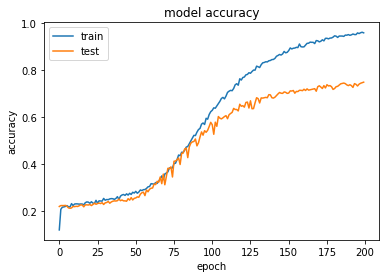

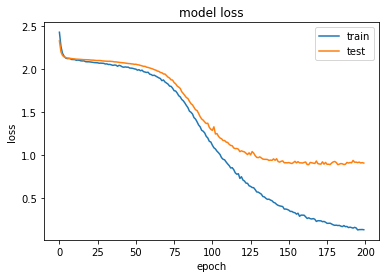

In [20]:
# trained_model = model.fit(x, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(trained_model.history.keys())
# summarize history for accuracy
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [21]:
ypred = model.predict(xte)

In [22]:
print ypred[0]
print ypred[1]

[  9.99996066e-01   7.72638202e-07   5.53570032e-07   1.48015559e-07
   2.19198029e-07   2.48074610e-08   3.40136530e-10   4.15850110e-09
   2.25508607e-08   7.42260156e-08   1.01633695e-07   2.12015925e-06]
[  9.94817197e-01   3.92149786e-07   4.73161554e-03   1.70402709e-04
   1.98657872e-04   3.73716336e-10   2.52166427e-10   4.98243558e-10
   1.17976663e-06   8.05108211e-05   2.23431584e-08   7.14516835e-10]


In [23]:
j, k = 0, 0
for i in zip(xte[0],xte[1]):
    if i[0]!=i[1]:
#         print i
        j += 1
    else:
        k += 1
print j, k

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
print ypred[4]
print yte[4]
a = ypred[4]

[  9.32410479e-01   1.58105139e-02   1.74074024e-02   1.21578742e-02
   1.09197936e-04   3.14270752e-03   2.17556044e-05   2.09822334e-04
   7.35172420e-04   1.23722781e-03   1.39998540e-03   1.53579451e-02]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [30]:
i = 0
for i, a in enumerate(ypred):
#     print a
    a[np.where(a==np.max(a))]=1
    a[np.where(a!=np.max(a))]=0
#     print a, yte[i]
#     print a.argmax()
#     if (a != yte[i]).all():
#     print a
    print i, a, ypred[i]
    
    if np.array_equal(a,yte[i]):
#         print a.argmax(), yte[i].argmax()
        i += 1
#     break

        
print i

0 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
3 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
4 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
5 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
6 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
7 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
8 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
9 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  1.  0.  0.  0.  0.  0.  